Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3705 - val_loss: 0.1774
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1682 - val_loss: 0.1430
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1401 - val_loss: 0.1286
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1280 - val_loss: 0.1207
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1211 - val_loss: 0.1153
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1160 - val_loss: 0.1116
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1127 - val_loss: 0.1094
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1104 - val_loss: 0.1068
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1080 - val_loss: 0.1046
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1052 - val_loss: 0.1026
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1037 - val_loss: 0.1015
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

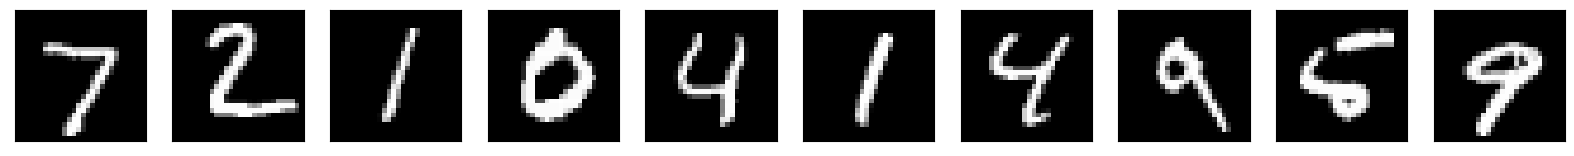

In [6]:
import numpy as np
import tensorflow as tf
from keras.api.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

from keras.api.models import Sequential, Model
from keras.api.layers import Input, Dense

input1 = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input1)

bottleneck = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input1, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))



import matplotlib.pyplot as plt
reconstructed = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    




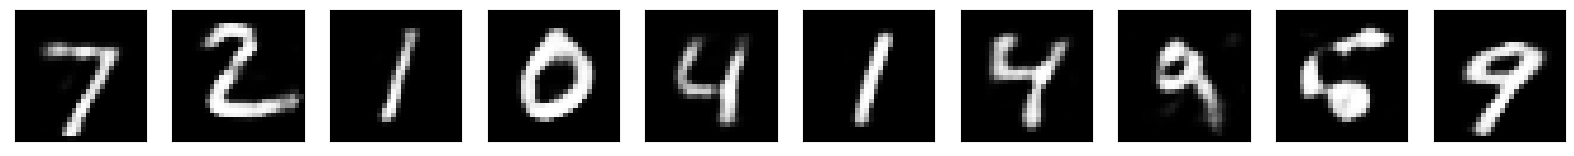

In [5]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)